In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def take_best_n(items, n):
    return np.argpartition(items, -n)[-n:]

In [4]:
class EvolutionaryStrategy:
    
    def __init__(self, n, m, d):
        self._x = np.random.uniform(-10, 10, size=(n, d))
        self._v = np.random.normal(size=(n, d))

        self._m = m
        self._n = n
        self._d = d
    
    def ask(self):
        # Take m copies of each parent
        x = np.repeat(self._x, self._m, axis=0)
        v = np.repeat(self._v, self._m, axis=0)

        # Update variabilities
        theta = np.random.normal(size=v.shape)/self._d**0.5
        self._v = v*np.exp(theta)

        # Update positions
        self._x = x + v*np.random.normal(size=v.shape)

        return self._x, self._v
    
    def tell(self, fitness):
        idx = take_best_n(fitness, self._n)
        self._x = self._x[idx]
        self._v = self._v[idx]
        self._f = fitness[idx]
        
    def result(self):
        return self._x, self._v, self._f

In [5]:
def radial_fitness(x):
    return -np.sum(x**2, axis=1)

opt = EvolutionaryStrategy(3, 5, 7)
x, v = opt.ask()
opt.tell(radial_fitness(x))
opt.result()


(array([[ 0.79981957,  8.46990619,  5.15223031, -3.93370273, -1.15860893,
         -6.55669895, -3.74425827],
        [ 1.07447324,  7.18279803,  5.49457768, -4.21882083, -1.37477295,
         -7.04333807, -3.01778117],
        [-0.97559074, -6.2604579 , -2.5648583 ,  7.29160404,  5.24235718,
         -4.28555493,  3.304162  ]]),
 array([[-0.57999799, -0.54170956,  1.00304793, -1.4437322 , -0.22618292,
         -0.87399004, -0.29533785],
        [-0.44658492, -0.37383264,  2.28715429, -1.83804065, -0.16586823,
         -1.52066353, -0.32676453],
        [-0.42601332,  0.55199349,  1.05439315,  0.0995765 , -0.73132425,
         -0.52082519, -1.58360141]]),
 array([-172.75066229, -161.34152833, -156.65687432]))

In [6]:
def computational_experiment(n, m, n_iter=100, d=7):

    optimizer = EvolutionaryStrategy(n, m, d)

    history = []
    for _ in range(n_iter):
        x, v = optimizer.ask()
        optimizer.tell(radial_fitness(x))
        x, v, f = optimizer.result()
        history.append((x, v, f))

    history_x = np.stack([item[0] for item in history], axis=-1)
    history_v = np.stack([item[1] for item in history], axis=-1)
    history_f = np.stack([item[2] for item in history], axis=-1)

    return history_x, history_v, history_f

In [7]:
computational_experiment(3, 5)[0].shape

(3, 7, 100)

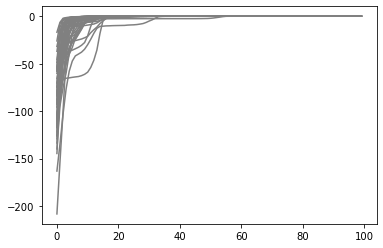

In [8]:
for _ in range(50):
    xs, vs, fs = computational_experiment(10, 100)
    plt.plot(fs.mean(axis=0), color="gray")

In [15]:
xs, vs, fs = computational_experiment(2, 10, d=2)

In [16]:
xs.shape

(2, 2, 100)

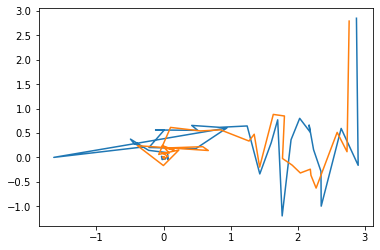

In [18]:
plt.plot(xs[0, 0, :], xs[0, 1, :])
plt.plot(xs[1, 0, :], xs[1, 1, :])

In [19]:
n = 3
f"img-{n:03d}.png"

'img-003.png'

image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    ...:     images.append(image.reshape(300, 500, 3)) ## Y×X

In [25]:
import imageio

In [32]:
def get_imagedata(fig):
    w, h = fig.get_size_inches()*fig.dpi
    imgdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    return imgdata.reshape(int(h), int(w), 3)

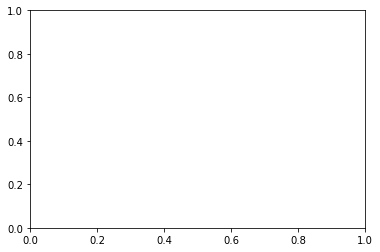

In [38]:
fig, ax = plt.subplots()
ax.set_xlim((-3, 3))
ax.set_ylim((-3, 3))

images = []
for k in range(xs.shape[-1]):
    ax.set_xlim((-3, 3))
    ax.set_ylim((-3, 3))
    x = xs[:, 0, k]
    y = xs[:, 1, k]
    ax.scatter(x, y)    
    
    fig.canvas.draw()
    imgdata = get_imagedata(fig)
    images.append(imgdata)
    ax.clear()
    
    
imageio.mimsave("animation.gif", images)

In [35]:
fig.clear()

In [29]:
fig.get_size_inches()*fig.dpi

array([432., 288.])